<a href="https://colab.research.google.com/github/neuroscout/neuroscout-cli/blob/colab/Neuroscout_CLI_Colab_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run Neuroscout on Google Colab

In this Notebook, we will demo `Neuroscout` in cloud using the free resources available in Google Colab.

Feel free to change the `analysis_id` to your own analysis' to run you own model in the cloud!

To minimize downloads, we've uploaded the `Budapest` dataset to Google Drive, but feel free to run analyses from other datasets by downloading data using the `get` command.

In [13]:
#@title 1) Run once to install Neuroscout-CLI & DataLad
%%capture --no-display --no-stderr
from IPython.display import display
display("Installing NeuroDebian...")

## Set up DataLad
!wget -O- http://neuro.debian.net/lists/bionic.us-tn.full | sudo tee /etc/apt/sources.list.d/neurodebian.sources.list && sudo apt-key adv --recv-keys --keyserver hkps://keyserver.ubuntu.com 0xA5D32F012649A5A9 && sudo apt-get update
display("Installing DataLad...")

!sudo apt-get install datalad -y
!git config --global user.email "you@example.com" && git config --global user.name "Your Name"

display("Installing Neuroscout...")
%pip install neuroscout-cli
display("Done.")


'Installing NeuroDebian...'

'Installing DataLad...'

'Installing Neuroscout...'

'Done.'

In [21]:
#@title 2) Set your Neuroscout Analysis ID { run: "auto" }

analysis_id = 'iarv7' #@param {type:"string"}

import os
os.environ['ANALYSIS_ID'] = analysis_id

print(f"Analysis ID set to: {analysis_id}")

Analysis ID set to: iarv7


### 3) Mount Google Drive (optional)

For this demo, we provide a copy of the `Budapest` dataset in Google Drive.
You can run this model, and any model using this dataset without downloading any fMRI data. 

This is **optional** so feel free to skip this step, and the `run` command will download the required data for any `analysis_id` automatically.


1.   First, use this link to add the `neuroscout-datasets` folder to your Drive: https://drive.google.com/drive/folders/1wpw6wholT8ej-xhB-gsXo2tnahSvxCWs?usp=sharing
2.   Next, run the following command to mount your Drive to this Notebook (You will have to approve permissions).

In [38]:
# Optional:
from google.colab import drive
drive.mount('/content/drive')

### 4) Run your model

Now, we can use `neuroscout` to run our analysis.

`neuroscout` uses [FitLins](https://fitlins.readthedocs.io/en/latest/) to intepret your analysis' `BIDS Statistical Model`, and construct a workflow to fit the model. 

We can pass any valid `FitLins` arguments by passing them to `neuroscout`. 

For example, `--n-cpus=2` is passed to `FitLins` to set the maximum number of CPU cores (Colab only has 2 cores available).

---

Since we are providing a pre-downloaded dataset, we will want to instruct `neuroscout` to skip data fetching (`--no-get`), and point neuroscout to the `--download-dir` where our cached data is. 

In [ ]:
!neuroscout run --no-get --download-dir=/content/drive/MyDrive/neuroscout-datasets --n-cpus=2 $ANALYSIS_ID /out

INFO:root:Analysis ID : iarv7
IMPORTANT:cli:
Running FitLins version 0.10.1:
  * Participant list: None.

220428-17:42:28,69 nipype.workflow INFO:
	 [Node] Setting-up "fitlins_wf.loader" in "/tmp/tmpwoua1sla/fitlins_wf/loader".
220428-17:42:28,77 nipype.workflow INFO:
	 [Node] Executing "loader" <fitlins.interfaces.bids.LoadBIDSModel>
/usr/local/lib/python3.7/dist-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "
/usr/local/lib/python3.7/dist-packages/bids/modeling/statsmodels.py:56: UserWarning: [Node run; Contrast speech]:Contrast 'Type' is now 'Test'.
  warnings.warn(f"[Node {node['name']}; Contrast {contrast['name']}]:"
220428-17:42:33,957 nipype.workflow INFO:
	 [Node] Finished "loader", elapsed time 5.877704s.
220428-17:42:42,531 nipype.workflow INFO:
	 [Node] Setting-up "fit

If you want to run an analysis without Google Drive (i.e. any analysis not using the `Budapest` dataset, simply remove the `--no-get` and `--dataset-dir` argments, and the fMRI data will be downloaded to the `/out` directory.

In [ ]:
# !neuroscout run --n-cpus=2 $ANALYSIS_ID /out

### 5) Explore results

You can explore uploaded results on [neuroscout.org](https://neuroscout.org) by returning to the analysis builder page for your analysis.

Example: https://neuroscout.org/builder/iarv7

You can also view the local analysis outputs, stored in `/neuroscout-{ANALYSIS_ID}` in this notebook.

In [ ]:
!ls /out/neuroscout-${ANALYSIS_ID}/

fitlins  options.json  sourcedata


The output directory has two sub folders:
   - `fitlins`: contains the outputs of the model as executed by [FitLins](https://fitlins.readthedocs.io/en/latest/)
   - `sourcedata` includes all of the inputs required for execution, including Predictor events and the BIDS Stats Model JSON specification. If you did not specificy a cached `--dataset-dir` you will also find your preprocessed fMRI inputs here. 

In [ ]:
!ls /out/neuroscout-${ANALYSIS_ID}

fitlins  options.json  sourcedata


Within the `fitlins` folder, we have `dataset` (i.e. group) level result images, HTML analysis `reports`, as well as subject level results.

For each contrast (in this instance there is only one: `speech`), we have maps of various statistics available. 

Here, we're going to plot all group level `t` maps:

/usr/local/lib/python3.7/dist-packages/nilearn/plotting/img_plotting.py:341: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


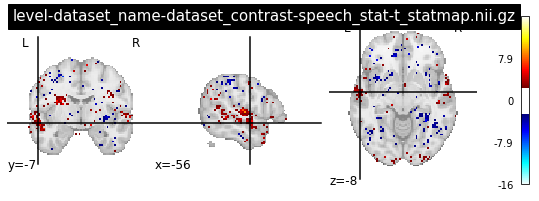

In [ ]:
from nilearn.plotting import plot_stat_map
from pathlib import Path

outputs = Path(f"/out/neuroscout-{analysis_id}/fitlins/")
statmaps = outputs.glob('level-dataset_*contrast*stat-t*.nii.gz')

for map in statmaps:
  plot_stat_map(str(map), title=map.name, threshold=2.58)

In our example analysis, `iarv7`, even with only 10 subjects (only first run), we see peak activity in the STS for speech, as expected.